# Decision Tree

In [1]:
# Import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


data = pd.read_csv("../preprocessed_data.csv")
data

age gender  height_cm  weight_kg  body_fat_%  diastolic  systolic   
0      27.0      M      172.3      75.24        21.3       80.0     130.0  \
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
12726  39.0      M      174.4      70.80        24.3       78.0     132.0   
12727  25.0      M      172.1      71.80        16.2       74.0     141.0   
12728  21.0      M      179.7      63.90        12.1       74.0     128.0   
12729  39.0      M      177.2      80.50        20.1       78.0     132.0   
12730  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripforce  sit_and_bend_forward_cm  sit_ups_counts  broad_jump_cm   
0           54.9                     18.4            60.0          217.0  \
1           36.4                     16.3            53.0          229.0   
2           44.8                     12.0            49.0          181.0   
3           41.4                     15.2            53.0          219.0   
4           43.5                     27.1            45.0          217.0   
...          ...                      ...             ...            ...   
12726       41.6                     12.0            44.0          168.0   
12727       35.8                     17.4            47.0          198.0   
12728       33.0                      1.1            48.0          167.0   
12729       63.5                     16.4            45.0          229.0   
12730       35.9                      7.1            51.0          180.0   

      class    bmi  
0         C  22.79  
1         A  17.78  
2         C  22.46  
3         B  21.21  
4         B  20.30  
...     ...    ...  
12726     B  21.14  
12727     C  21.78  
12728     D  18.39  
12729     A  23.57  
12730     C  21.21  

[12731 rows x 13 columns]

In [2]:
feature_cols = ['age','body_fat_%','gripforce','sit_and_bend_forward_cm','sit_ups_counts','broad_jump_cm']
x = data[feature_cols]
y = data['class']

In [3]:
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n ) 
    gini = 1 - p_sum
    return gini

class_value_counts = data['class'].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the class is {gini_class:.3f}')

Number of samples in each class is:
class
C    3327
A    3322
B    3322
D    2760
Name: count, dtype: int64

Gini Impurity of the class is 0.749


In [4]:
def gini_split_a(attribute_name):
    attribute_values = data[attribute_name].value_counts()
    gini_A = 0 
    for key in attribute_values.keys():
        df_k = data['class'][data[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = data.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attiribute ={}
for key in feature_cols:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')

Gini for age is 0.741
Gini for body_fat_% is 0.691
Gini for gripforce is 0.702
Gini for sit_and_bend_forward_cm is 0.603
Gini for sit_ups_counts is 0.691
Gini for broad_jump_cm is 0.714


In [5]:
min_value = min(gini_attiribute.values())
print('The minimum value of Gini Impurity : {0:.3} '.format(min_value))
print('The maximum value of Gini Gain     : {0:.3} '.format(1-min_value))

selected_attribute = min(gini_attiribute.keys())
print('The selected attiribute is: ', selected_attribute)

The minimum value of Gini Impurity : 0.603 
The maximum value of Gini Gain     : 0.397 
The selected attiribute is:  age


In [12]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # 70% training and 30% test

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [14]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6073812328229289


[Text(1628.1993857817733, 5338.928571428572, 'sit_and_bend_forward_cm <= 14.35\ngini = 0.749\nsamples = 8911\nvalue = [2320, 2316, 2274, 2001]\nclass = A'),
 Text(387.29595512292616, 5144.785714285715, 'sit_and_bend_forward_cm <= 5.25\ngini = 0.652\nsamples = 3408\nvalue = [65, 676, 1217, 1450]\nclass = D'),
 Text(23.44948345298547, 4950.642857142857, 'age <= 55.5\ngini = 0.162\nsamples = 740\nvalue = [0, 0, 66, 674]\nclass = D'),
 Text(5.210996322885659, 4756.5, 'sit_and_bend_forward_cm <= 4.55\ngini = 0.057\nsamples = 617\nvalue = [0, 0, 18, 599]\nclass = D'),
 Text(2.6054981614428296, 4562.357142857143, 'gini = 0.0\nsamples = 549\nvalue = [0, 0, 0, 549]\nclass = D'),
 Text(7.816494484328489, 4562.357142857143, 'age <= 29.5\ngini = 0.389\nsamples = 68\nvalue = [0, 0, 18, 50]\nclass = D'),
 Text(5.210996322885659, 4368.214285714286, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 0, 26]\nclass = D'),
 Text(10.421992645771319, 4368.214285714286, 'broad_jump_cm <= 187.5\ngini = 0.49\nsamples 

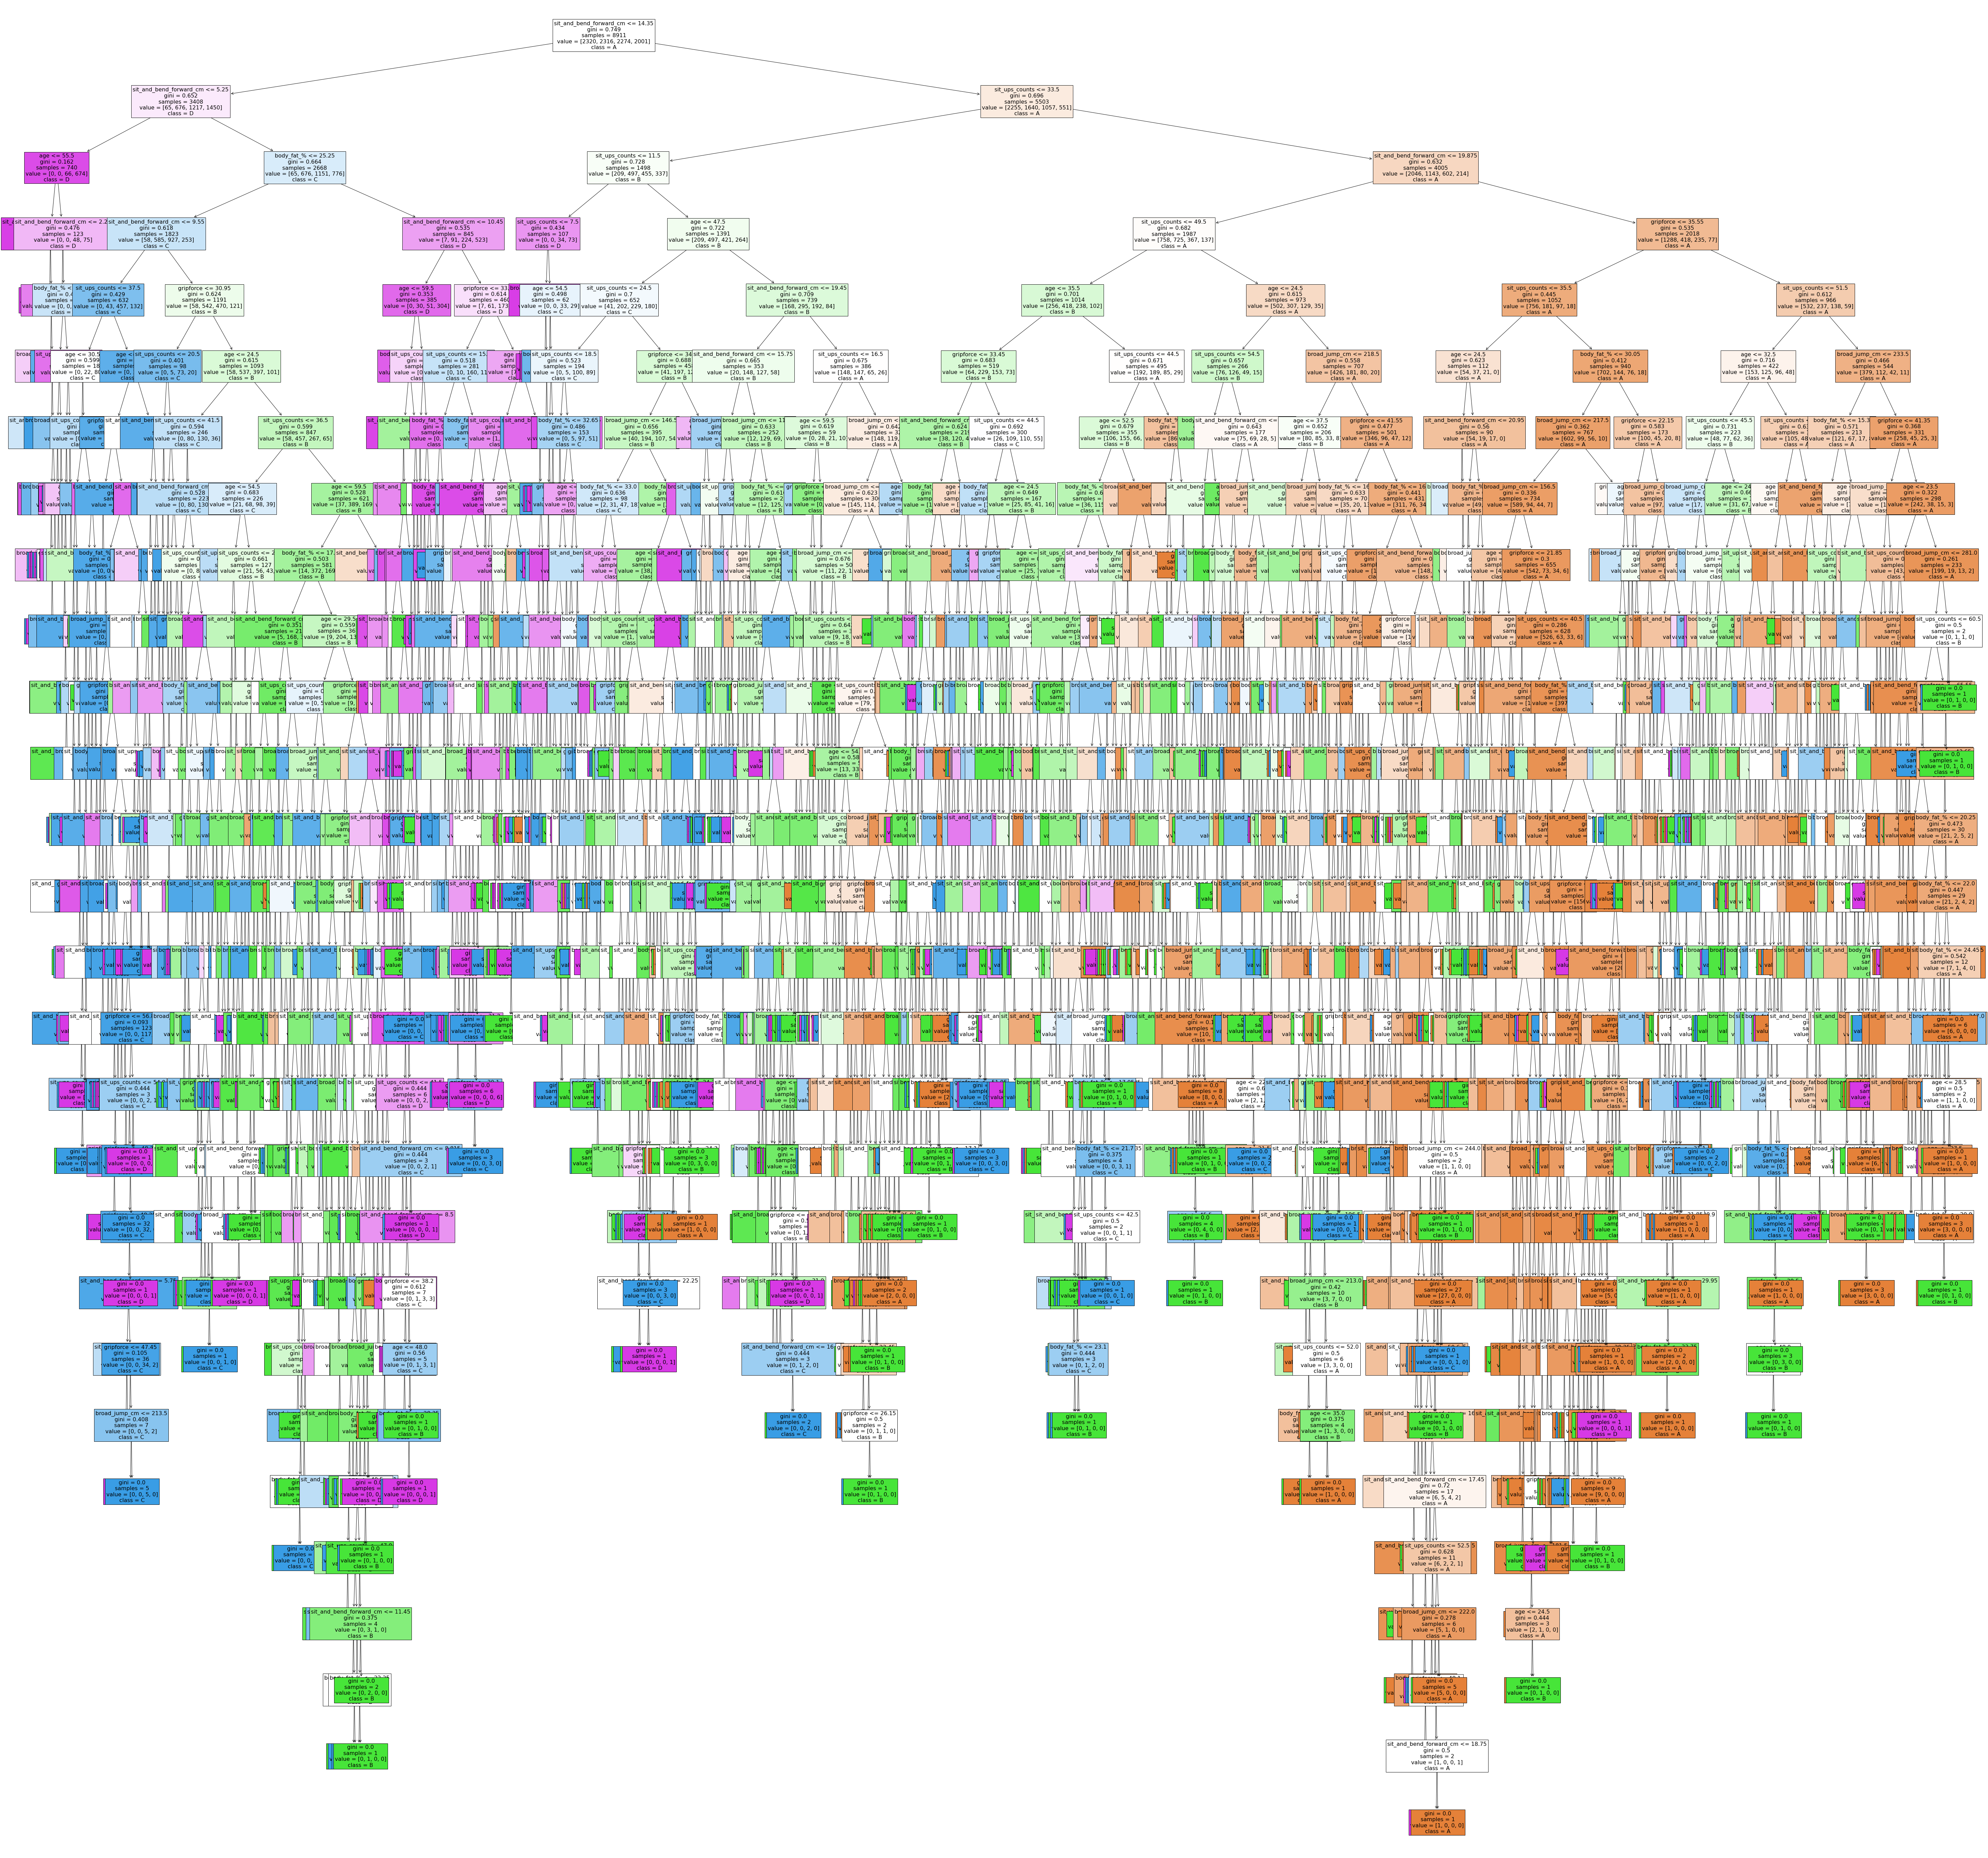

In [9]:
#ปรับขนาดตรงนี้นะพี่
plt.figure(figsize = (100,100))
#ปรับขนาดฟร้อนให้เล็กลงด้วยก็ได้ ตรง fontsize
plot_tree(clf,filled=True,
            feature_names = feature_cols,class_names=['A','B','C','D'],fontsize=16)

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5649214659685864


[Text(1198.8995901639344, 1744.05, 'sit_and_bend_forward_cm <= 14.35\nentropy = 1.997\nsamples = 8911\nvalue = [2320, 2316, 2274, 2001]\nclass = A'),
 Text(545.422131147541, 1426.9499999999998, 'sit_and_bend_forward_cm <= 6.55\nentropy = 1.627\nsamples = 3408\nvalue = [65, 676, 1217, 1450]\nclass = D'),
 Text(226.4016393442623, 1109.85, 'sit_and_bend_forward_cm <= 4.55\nentropy = 0.683\nsamples = 975\nvalue = [0, 0, 177, 798]\nclass = D'),
 Text(82.32786885245902, 792.75, 'age <= 55.5\nentropy = 0.308\nsamples = 653\nvalue = [0, 0, 36, 617]\nclass = D'),
 Text(41.16393442622951, 475.6500000000001, 'entropy = 0.0\nsamples = 549\nvalue = [0, 0, 0, 549]\nclass = D'),
 Text(123.49180327868854, 475.6500000000001, 'sit_and_bend_forward_cm <= 2.25\nentropy = 0.931\nsamples = 104\nvalue = [0, 0, 36, 68]\nclass = D'),
 Text(82.32786885245902, 158.55000000000018, 'entropy = 0.0\nsamples = 40\nvalue = [0, 0, 0, 40]\nclass = D'),
 Text(164.65573770491804, 158.55000000000018, 'entropy = 0.989\nsamp

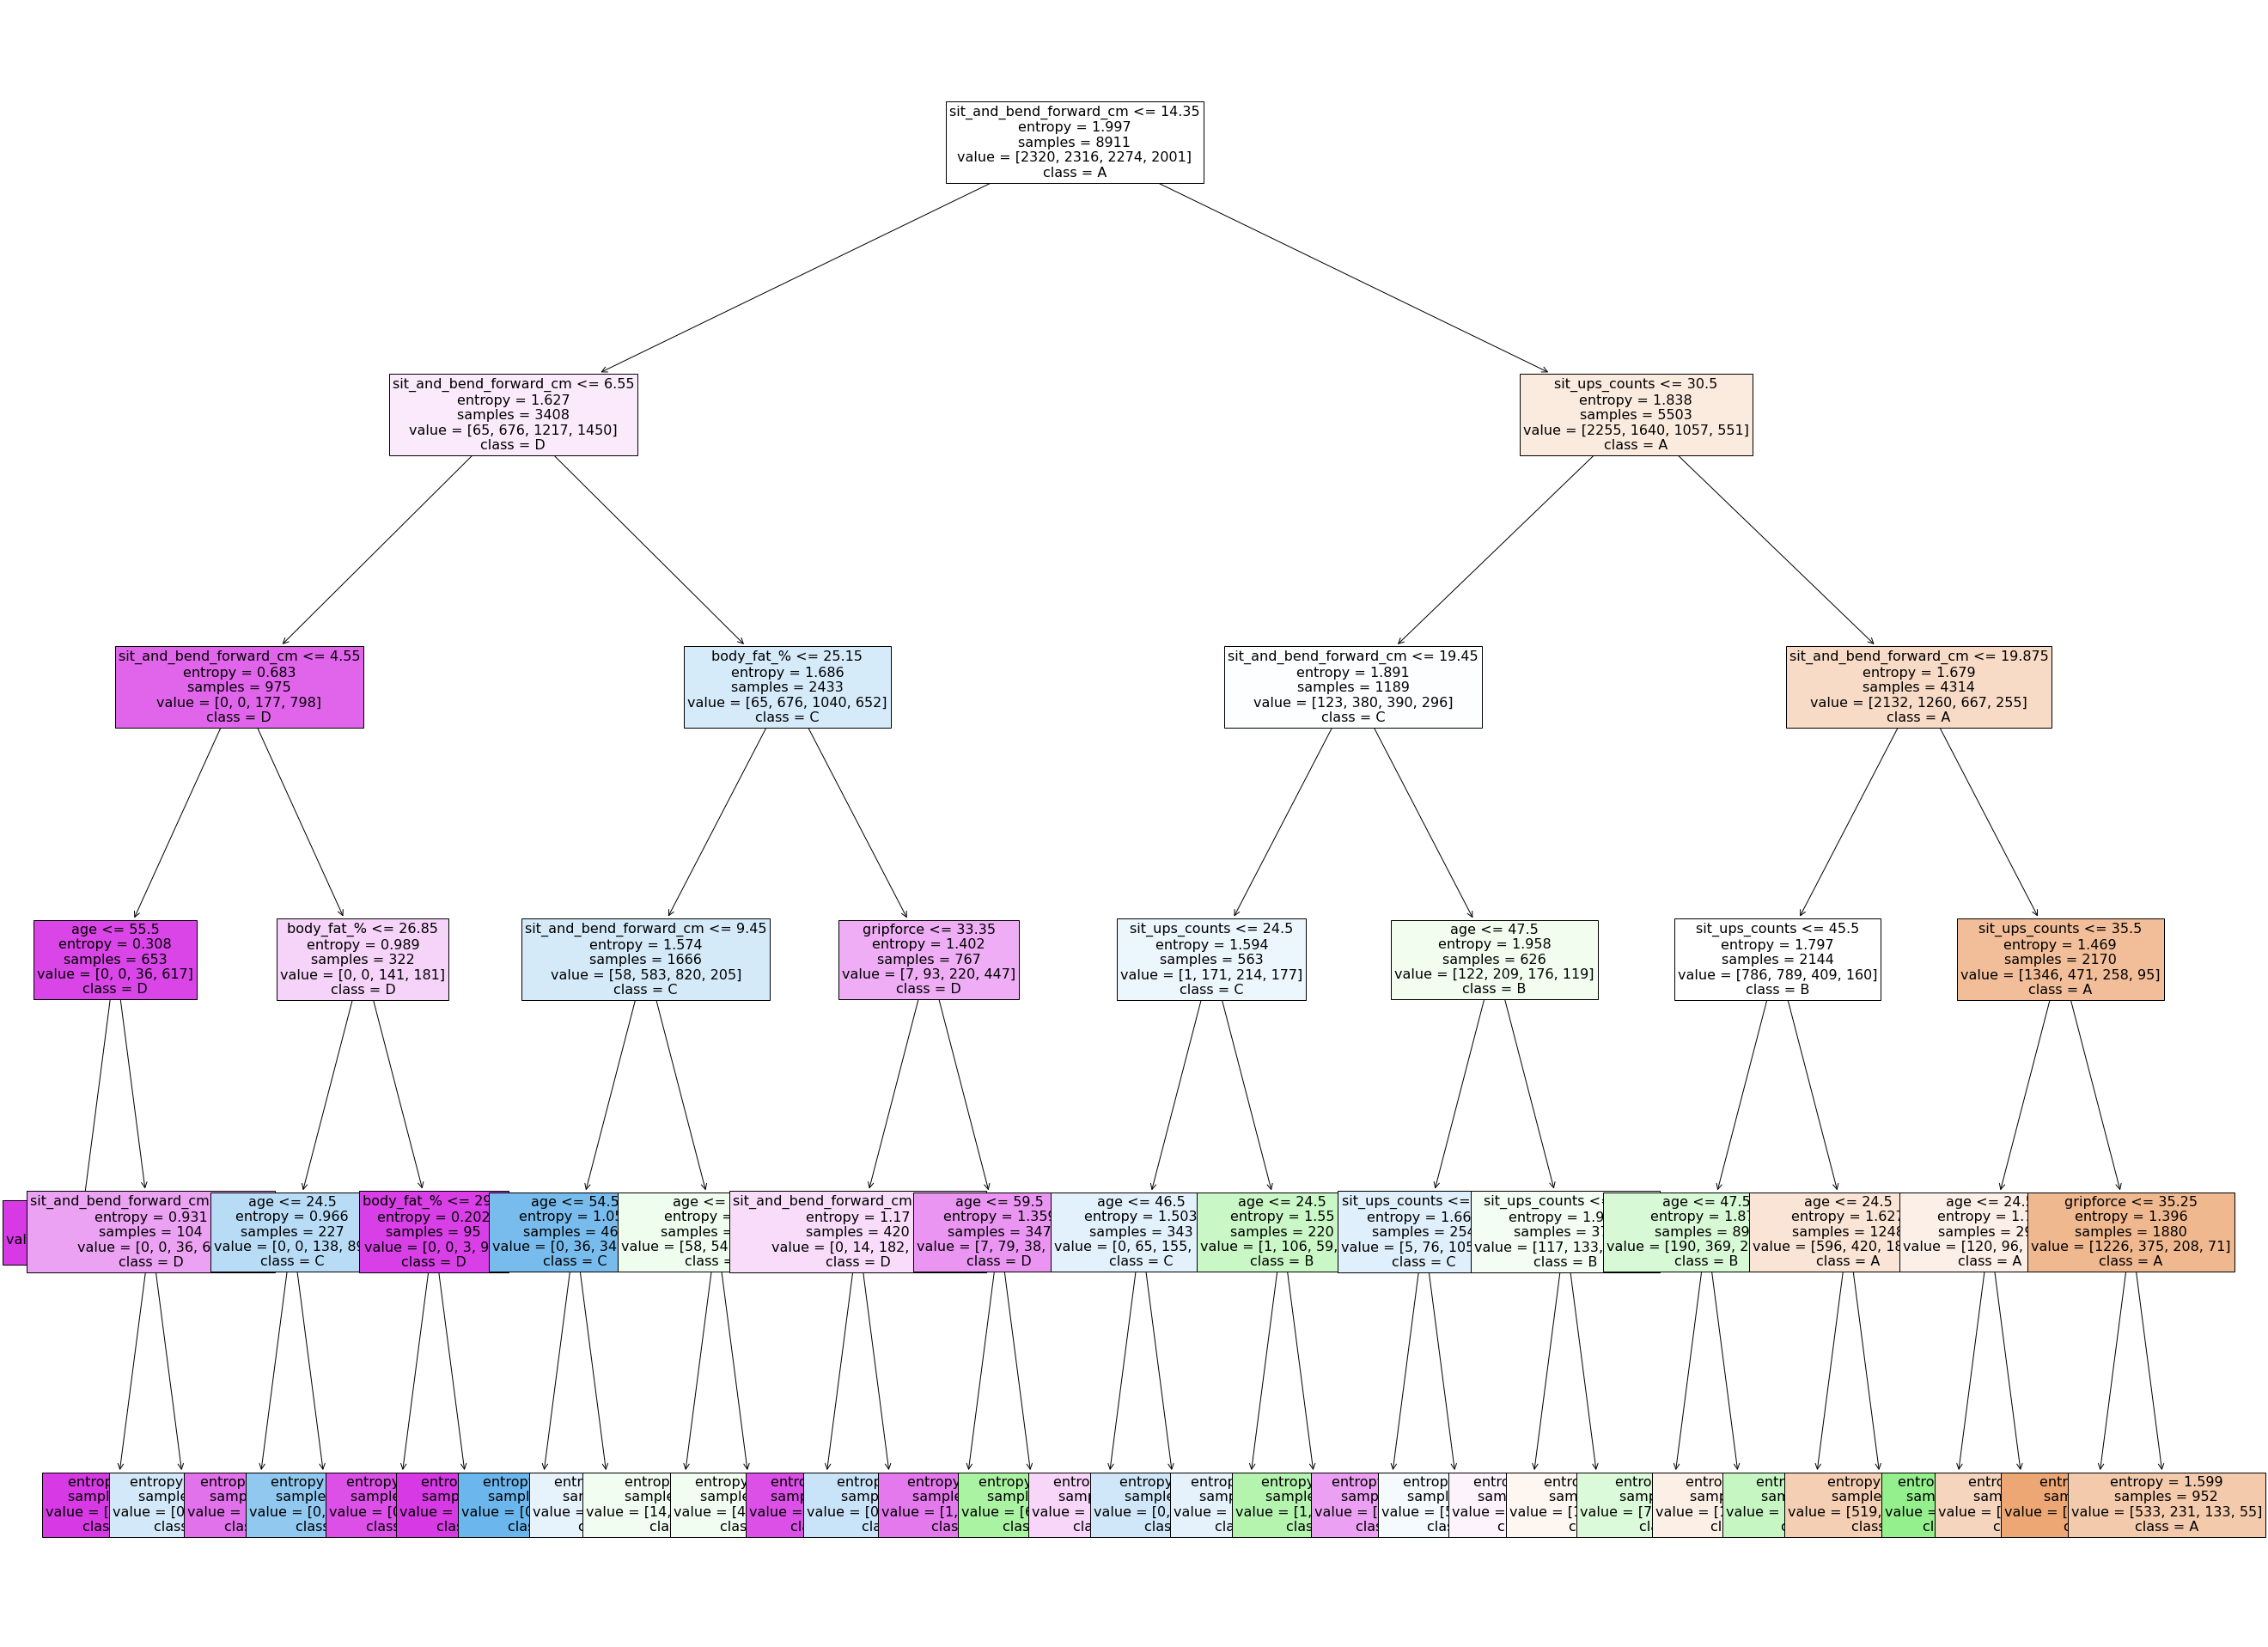

In [11]:
plt.figure(figsize = (45,35))

plot_tree(clf,filled=True,
            feature_names = feature_cols,class_names=['A','B','C','D'],fontsize=16)
#pydotplus.graph_from_dot_data(dot_data)  
#fig.savefig('imagename.png')
#graph.show_png('diabetes.png')
#Image(graph.create_png())
